In [2]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)

In [3]:
X_train = open_images("C:/Users/Steffen/Documents/Jupyter Notebooks/Udemy_Kurs/Kursmaterialien/Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")
X_train.shape

(60000, 28, 28)

In [4]:
# Um hier in Umgebung ausgeben
%matplotlib inline
import matplotlib.pyplot as plt

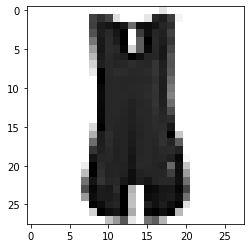

In [5]:
# Bild anzeigen, cmap um Bild einzufärben - Wert "gray" oder "gray_r" für reverse
plt.imshow(X_train[4], cmap="gray_r")


In [6]:
# Labeldaten importieren
y_train = open_labels("C:/Users/Steffen/Documents/Jupyter Notebooks/Udemy_Kurs/Kursmaterialien/Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")
# Ein Label ausgeben
y_train[1]

# y_train enthält 0-9. Array kann mit == operator in array mit bool verändert werden
y_train_is_tshirt = y_train == 0   # Kategorie T-shirt/top
y_train_is_tshirt

array([False,  True,  True, ..., False,  True, False])

![Label-Legende](./Labelbezeichner_fashionmnist.png)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
# 100 Neuronen im Hidden Layer, Sigmoid als Aktivierungsfunktion, 28 x 28 px --> 784 Eingänge
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
# 1 Ausgangsneuron, Sigmoid als Aktivierungsfunktion
model.add(Dense(1, activation="sigmoid"))
# Modell kompilieren --> Code wird für Hardware (GPU) vorbereitet, optimizer für weights: Stochastic Gradient Descent
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [9]:
# X_train Daten reshapen Matrix von 28 x 28 --> Liste 784
X_train_784 = X_train.reshape(60000, 784)
# fit(Eingabedaten, Labels, Epochen: Daten werden 10x durchlaufen, Batch Size: batch von 1000 Eingabedaten, dann weight opt.)
model.fit(X_train_784, y_train_is_tshirt, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 6ms/step - loss: 0.2643
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1880
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1651
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1477
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1392
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1334
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1289
Epoch 8/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1253
Epoch 9/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1220
Epoch 10/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1197


In [10]:
print(y_train_is_tshirt[1])

True


In [11]:
model.predict(X_train_784[1].reshape(1, 784))

array([[0.84237975]], dtype=float32)